# C1 - Introduction to Human and Computer Vision
## Week 2 - Draft Notebook

In [237]:
import os
import re
import matplotlib.pyplot as plt

# Get project's root directory
BASE_PATH = os.path.join(re.search(r'.+(Team5)', os.getcwd())[0], 'week2')
os.chdir(BASE_PATH)
BASE_PATH

'c:\\Users\\Usuario\\Documents\\Màster\\C1\\Team5\\week2'

### Load datasets

In [238]:
from src.image_dataset import ImageDataset, ColorSpace
import platform

if platform.system() == 'Windows':
    DATA_DIRECTORY = '../data'
else:
    DATA_DIRECTORY = './data'

# Load the Cropped Dataset (QueryDataset) and Background Dataset (BGDataset)
QueryDataset = ImageDataset(f'{DATA_DIRECTORY}/qsd1_w1', colorspace=ColorSpace.CieLab, interval=10)
BGDataset = ImageDataset(f'{DATA_DIRECTORY}/qsd2_w2', colorspace=ColorSpace.CieLab, interval=10)

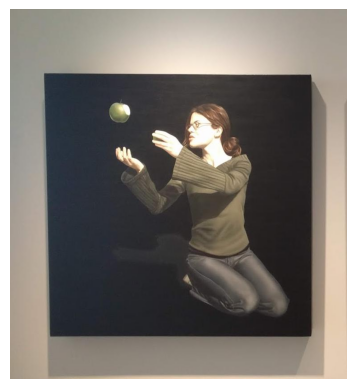

In [232]:
BGDataset.images[1].show_original()

### Task 1 - Block and hierarchical histograms

In [236]:
import importlib
import src.image

# Reload after making changes
importlib.reload(src.image) 
from src.image import Image

### Task 2 - Evaluate retrieval results

### Task 3 - Background removal

#### Plot Original / Groundtruth / Obtained Mask

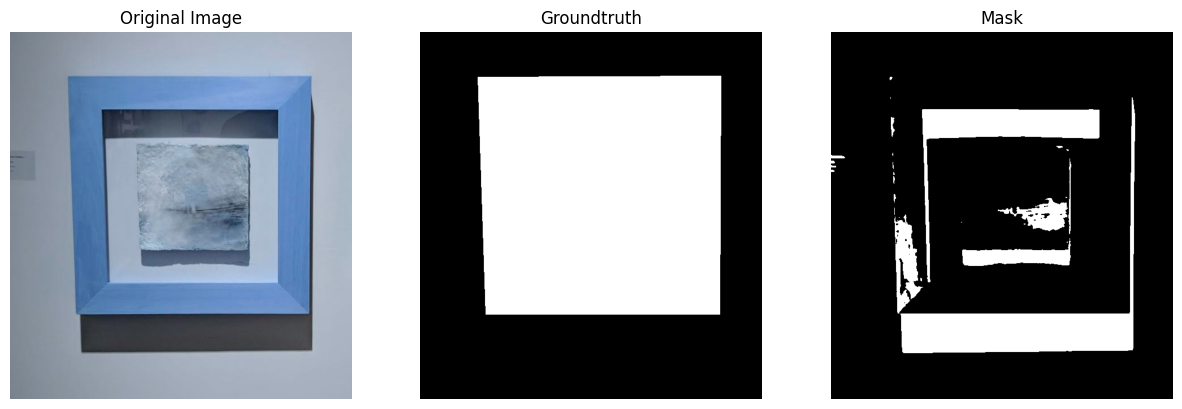

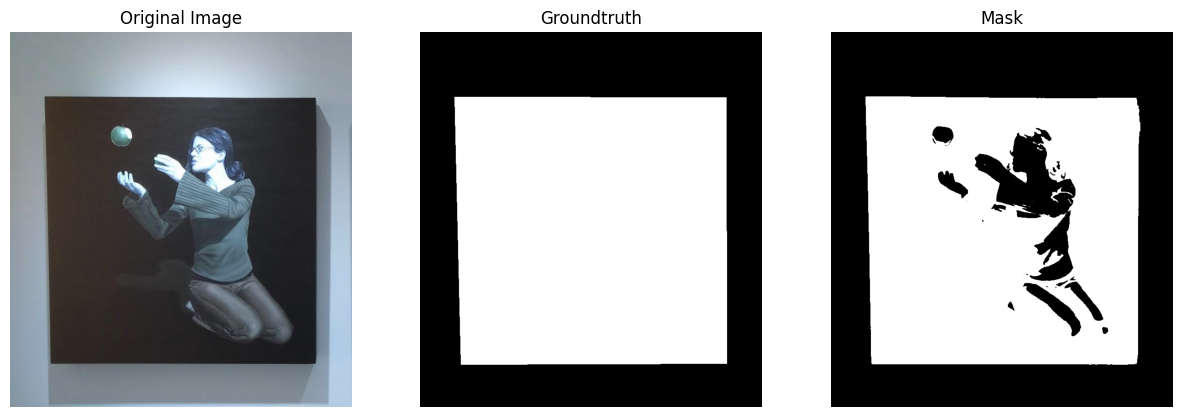

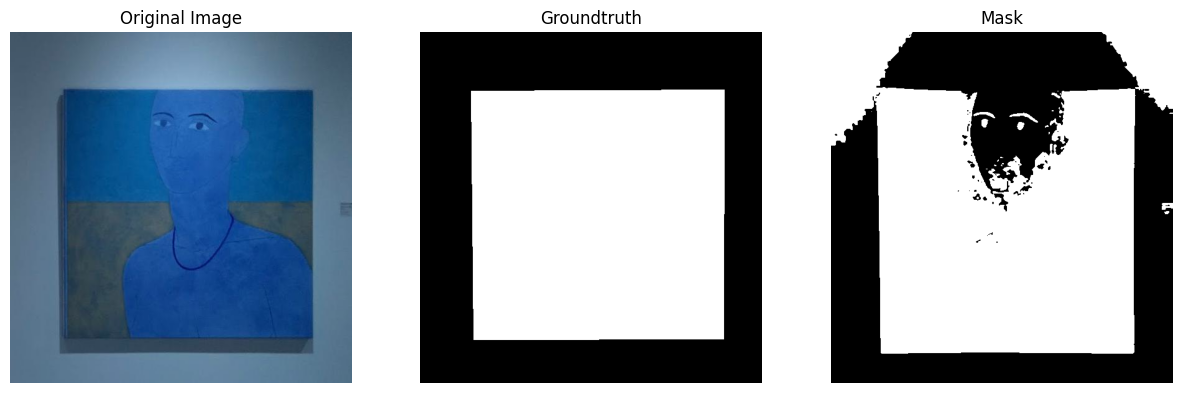

In [223]:
import importlib
import cv2
import src.background_removal

# Reload after making changes
importlib.reload(src.background_removal) 
from src.background_removal import get_mask

background_filenames = [f for f in os.listdir(f'{DATA_DIRECTORY}/qsd2_w2') if f.endswith('.png')]

for i in range(0, 3):
    image = BGDataset.images[i].original_image

    # Original Image
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    # Groundtruth
    ground_truth = os.path.join(f'{DATA_DIRECTORY}/qsd2_w2', background_filenames[i])
    ground_truth = cv2.imread(ground_truth)
    ground_truth = cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, 2)
    plt.imshow(ground_truth, cmap='gray')
    plt.title('Groundtruth')
    plt.axis('off')

    # Obtained Mask
    plt.subplot(1, 3, 3)
    plt.imshow(get_mask(image), cmap='gray')
    plt.title('Mask')
    plt.axis('off')

#### Save masks

### Task 4 - Background removal evaluation

In [231]:
import pandas as pd
import src.background_removal

# Reload after making changes
importlib.reload(src.background_removal) 
from src.background_removal import evaluate_masks

# First directory needs to be updated!
precision, recall, f1_score = evaluate_masks(f'{DATA_DIRECTORY}/qsd2_w2', f'{DATA_DIRECTORY}/qsd2_w2')

results = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Value': [precision, recall, f1_score]
})
print(results)

      Metric  Value
0  Precision    1.0
1     Recall    1.0
2   F1 Score    1.0


### Task 5 - Retrieval

### Task 6 - .pkl results generation